In [1]:
# !kaggle competitions download -c tabular-playground-series-jul-2022


  0%|          | 0.00/19.6M [00:00<?, ?B/s]
  5%|5         | 1.00M/19.6M [00:00<00:03, 5.18MB/s]
 15%|#5        | 3.00M/19.6M [00:00<00:02, 6.22MB/s]
 20%|##        | 4.00M/19.6M [00:00<00:02, 6.08MB/s]
 25%|##5       | 5.00M/19.6M [00:00<00:02, 6.78MB/s]
 31%|###       | 6.00M/19.6M [00:00<00:01, 7.36MB/s]
 36%|###5      | 7.00M/19.6M [00:01<00:02, 6.44MB/s]
 41%|####      | 8.00M/19.6M [00:01<00:02, 5.78MB/s]
 46%|####5     | 9.00M/19.6M [00:01<00:02, 5.57MB/s]
 51%|#####     | 10.0M/19.6M [00:01<00:01, 5.19MB/s]
 56%|#####6    | 11.0M/19.6M [00:01<00:01, 5.17MB/s]
 61%|######1   | 12.0M/19.6M [00:02<00:01, 5.05MB/s]
 66%|######6   | 13.0M/19.6M [00:02<00:01, 4.96MB/s]
 71%|#######1  | 14.0M/19.6M [00:02<00:01, 4.90MB/s]
 76%|#######6  | 15.0M/19.6M [00:02<00:01, 4.80MB/s]
 81%|########1 | 16.0M/19.6M [00:02<00:00, 4.94MB/s]
 87%|########6 | 17.0M/19.6M [00:03<00:00, 4.67MB/s]
 92%|#########1| 18.0M/19.6M [00:03<00:00, 4.86MB/s]
 97%|#########6| 19.0M/19.6M [00:03<00:00, 4.87MB/s]
1

In [2]:
# from zipfile import ZipFile

In [4]:
# with ZipFile('tabular-playground-series-jul-2022.zip', 'r') as zipObj:
#     zipObj.extractall()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data.csv')
df

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [22]:
def plot_feature_distribution(df):
    fig, axes = plt.subplots(5, 6, figsize=(20,20))
    fig.suptitle("Distribution of all features")

    for i, col in enumerate(df.columns[1:]):
        plt.subplot(5,6,i+1)
        sns.histplot(data=df, x=col)
        plt.tick_params(axis='both', left=False, bottom=False, labelleft=False)
        plt.ylabel('')

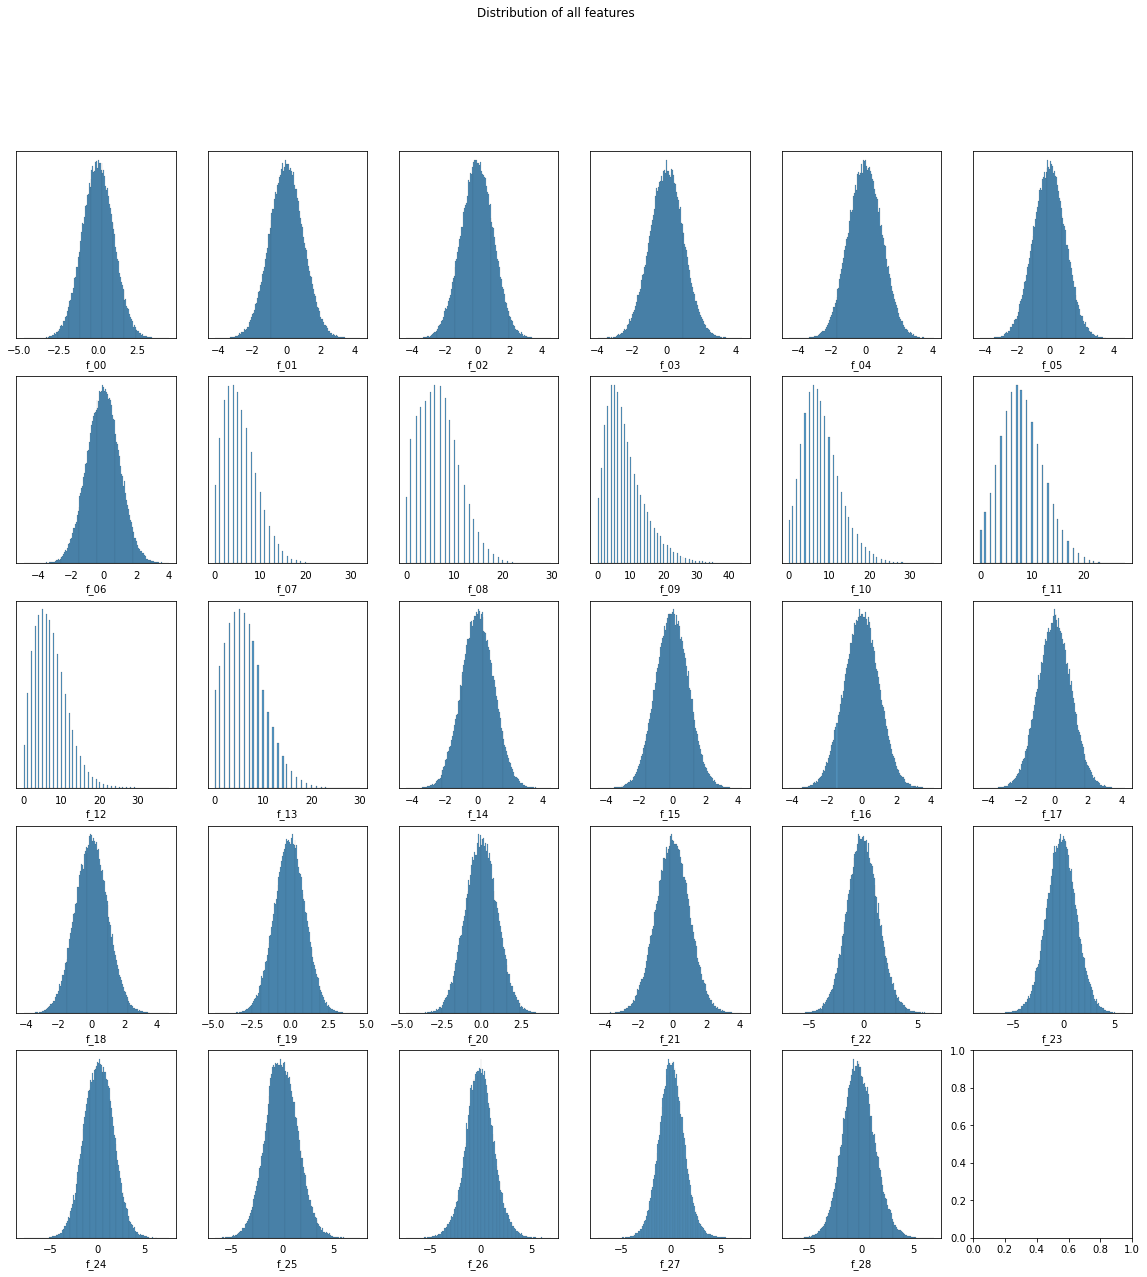

In [23]:
plot_feature_distribution(df)